In [1]:
#.......................................................Foot_Training...............................................#

import os
import time
import joblib
import warnings
import numpy as np
import pandas as pd
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import classification_report 
warnings.filterwarnings(action = 'ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("fsr_dataset.csv")
df[:] = np.nan_to_num(df)

In [3]:
df[:]

,FSR_1,FSR_2,FSR_3,FSR_4,FSR_5,Target
0,74,16,184,23,202,mild
1,127,200,157,294,222,severe
2,252,36,220,236,174,moderate
3,230,98,249,53,165,moderate
4,284,226,242,93,2,moderate
...,...,...,...,...,...,...
99995,25,172,189,161,57,moderate
99996,260,10,52,258,66,moderate
99997,294,252,13,71,0,moderate
99998,62,0,295,66,71,mild


In [4]:
df[:]['Target'].unique()

array(['mild', 'severe', 'moderate'], dtype=object)

In [5]:
df[:]['Target'].value_counts()

moderate    79614
mild        10397
severe       9989
Name: Target, dtype: int64

In [6]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

,FSR_1,FSR_2,FSR_3,FSR_4,FSR_5,Target
0,74,16,184,23,202,mild
1,127,200,157,294,222,severe
2,252,36,220,236,174,moderate
3,230,98,249,53,165,moderate
4,284,226,242,93,2,moderate
...,...,...,...,...,...,...
99995,25,172,189,161,57,moderate
99996,260,10,52,258,66,moderate
99997,294,252,13,71,0,moderate
99998,62,0,295,66,71,mild


In [7]:
df.shape

(100000, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   FSR_1   100000 non-null  int64 
 1   FSR_2   100000 non-null  int64 
 2   FSR_3   100000 non-null  int64 
 3   FSR_4   100000 non-null  int64 
 4   FSR_5   100000 non-null  int64 
 5   Target  100000 non-null  object
dtypes: int64(5), object(1)
memory usage: 4.6+ MB


In [9]:
df.describe()

,FSR_1,FSR_2,FSR_3,FSR_4,FSR_5
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,149.325660,149.565110,149.233670,149.415080,149.308840
std,86.753749,86.379702,86.727286,86.654561,86.602959
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,75.000000,74.000000,74.000000,74.000000
50%,149.000000,150.000000,149.000000,149.000000,149.000000
75%,224.000000,224.000000,224.000000,225.000000,224.000000
max,299.000000,299.000000,299.000000,299.000000,299.000000


In [10]:
df.head(73590)

,FSR_1,FSR_2,FSR_3,FSR_4,FSR_5,Target
0,74,16,184,23,202,mild
1,127,200,157,294,222,severe
2,252,36,220,236,174,moderate
3,230,98,249,53,165,moderate
4,284,226,242,93,2,moderate
...,...,...,...,...,...,...
73585,181,215,267,112,107,moderate
73586,190,31,286,102,157,moderate
73587,3,174,3,240,53,mild
73588,274,281,17,219,44,moderate


In [11]:
df1=df

In [12]:
df1['Target'].unique()

array(['mild', 'severe', 'moderate'], dtype=object)

In [13]:
filter = df1["Target"]=='moderate'

In [14]:
df1.where(filter)

,FSR_1,FSR_2,FSR_3,FSR_4,FSR_5,Target
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,252.0,36.0,220.0,236.0,174.0,moderate
3,230.0,98.0,249.0,53.0,165.0,moderate
4,284.0,226.0,242.0,93.0,2.0,moderate
...,...,...,...,...,...,...
99995,25.0,172.0,189.0,161.0,57.0,moderate
99996,260.0,10.0,52.0,258.0,66.0,moderate
99997,294.0,252.0,13.0,71.0,0.0,moderate
99998,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df1['Target'].value_counts()

moderate    79614
mild        10397
severe       9989
Name: Target, dtype: int64

In [16]:
df1['Target'].replace({'moderate':0,'mild':1,'severe':2},inplace=True)

In [17]:
df1

,FSR_1,FSR_2,FSR_3,FSR_4,FSR_5,Target
0,74,16,184,23,202,1
1,127,200,157,294,222,2
2,252,36,220,236,174,0
3,230,98,249,53,165,0
4,284,226,242,93,2,0
...,...,...,...,...,...,...
99995,25,172,189,161,57,0
99996,260,10,52,258,66,0
99997,294,252,13,71,0,0
99998,62,0,295,66,71,1


In [18]:
y = df['Target'].values
X = df.drop('Target', axis=1).values

In [19]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [20]:
X_train

array([[231, 243, 274, 261, 149],
       [138, 248, 229, 173,  44],
       [  9,  50,  35, 190,   6],
       ...,
       [221,  65,  67,  58, 245],
       [213, 217, 265,  99, 215],
       [  1, 215, 284, 113, 199]], dtype=int64)

In [21]:
y_train

array([2, 0, 1, ..., 0, 2, 0], dtype=int64)

In [22]:
from collections import Counter
counts = Counter(y_train)

# Print value counts
print(counts)

Counter({0: 55799, 1: 7246, 2: 6955})


In [23]:
knn = KNeighborsClassifier(n_neighbors=6)

In [24]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [25]:
y_pred = knn.predict(X_test)
print("Prediction : {}".format(y_pred))

Prediction : [0 0 0 ... 0 1 0]


In [26]:
print("Foot Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Foot Accuracy: 97.06666666666666


In [27]:
joblib.dump(knn,'foot_model.pkl')

['foot_model.pkl']

In [28]:
results = confusion_matrix(y_test, y_pred) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_test, y_pred))
print('Report :')
print(classification_report(y_test, y_pred))

Confusion Matrix :
[[23647    93    75]
 [  363  2788     0]
 [  349     0  2685]]
Accuracy Score : 0.9706666666666667
Report :
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     23815
           1       0.97      0.88      0.92      3151
           2       0.97      0.88      0.93      3034

    accuracy                           0.97     30000
   macro avg       0.97      0.92      0.94     30000
weighted avg       0.97      0.97      0.97     30000



In [29]:
#creating XGBoost model
from xgboost.sklearn import XGBRegressor
XGB = XGBRegressor()
XGB.fit(X_train,y_train)
y_pred = XGB.predict(X_test)

In [30]:
# calculating RMSE 
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))

In [31]:
# calculating RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))

In [32]:
#Root mean square error(RMSE)
print("RMSE:",rmse)

RMSE: 0.3228911395795748


In [33]:
XGB_Score=XGB.score(X_test,y_test)

In [34]:
XGB_Score

0.7488549611304526

In [35]:
#linear regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

In [36]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:",rmse)

RMSE: 0.6214732012367187


In [37]:
LR_Score=regressor.score(X_test,y_test)

In [38]:
LR_Score

0.06962686797997597

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn = KNeighborsClassifier(n_neighbors=6)

In [41]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [42]:
y_pred=knn.predict(X_test)

In [43]:
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [44]:
yl=[]
for i in y_test:
    yl.append(i)

In [45]:
c=0
for i in range(len(yl)):
    print(yl[i],y_pred[i])
    if yl[i]==y_pred[i]:
        c=c+1
    

0 0
0 0
0 0
0 0
0 0
1 1
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
1 1
0 0
0 0
0 0
2 2
0 0
0 0
2 2
0 0
0 0
2 2
0 0
2 2
0 0
0 0
1 1
0 0
2 2
2 2
0 0
0 0
0 0
0 0
0 0
2 2
1 1
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 2
2 2
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
2 2
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 0
0 0
0 0
0 0
2 2
0 0
0 0
2 2
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
1 1
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
2 2
0 0
0 0
1 1
0 0
2 2
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
1 1
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
2 2
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2


0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
1 1
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
1 1
2 0
1 1
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
2 2
2 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
1 1
0 0
0 0
1 1
0 0
0 0
0 0
1 1
2 2
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
2 2
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
2 2
1 1
0 0
0 0
2 2
2 2
0 0
2 2
0 0
2 2
0 0
0 0
0 0
2 2
0 0
0 0
1 1
0 0
1 1
2 2
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
2 0
1 0
0 0
0 0
2 2
0 0
0 0
1 1
0 0
0 0
0 0
1 1
0 0
0 0


In [46]:
KNN_Score=c/len(y_pred)%100

In [47]:
KNN_Score

0.9706666666666667

In [48]:
from sklearn.metrics import classification_report,confusion_matrix

In [49]:
print(confusion_matrix(y_test,y_pred))

[[23647    93    75]
 [  363  2788     0]
 [  349     0  2685]]


In [50]:
print( classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     23815
           1       0.97      0.88      0.92      3151
           2       0.97      0.88      0.93      3034

    accuracy                           0.97     30000
   macro avg       0.97      0.92      0.94     30000
weighted avg       0.97      0.97      0.97     30000



0.9431666666666667
train score - 1.0
test score - 0.9431666666666667


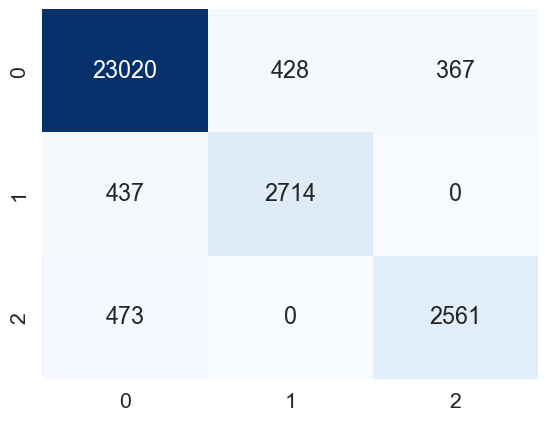

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     23815
           1       0.86      0.86      0.86      3151
           2       0.87      0.84      0.86      3034

    accuracy                           0.94     30000
   macro avg       0.90      0.89      0.90     30000
weighted avg       0.94      0.94      0.94     30000



In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
dtc = DecisionTreeClassifier(criterion='entropy',random_state=0)
dtc.fit(X_train,y_train)
y_pred_dtc = dtc.predict(X_test)
dtc_score = accuracy_score(y_pred_dtc,y_test)
print(dtc_score)
print("train score - " + str(dtc.score(X_train, y_train)))
print("test score - " + str(dtc.score(X_test, y_test)))
cm_dtc = confusion_matrix(y_test,y_pred_dtc)

sns.set(font_scale=1.4) # for label size
#sns.heatmap(cm_dtc, annot=True, annot_kws={"size": 16}) # font size
sns.heatmap(cm_dtc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.show()
print(classification_report(y_test, y_pred_dtc))

0.9603666666666667
train score - 0.9979714285714286
test score - 0.9603666666666667


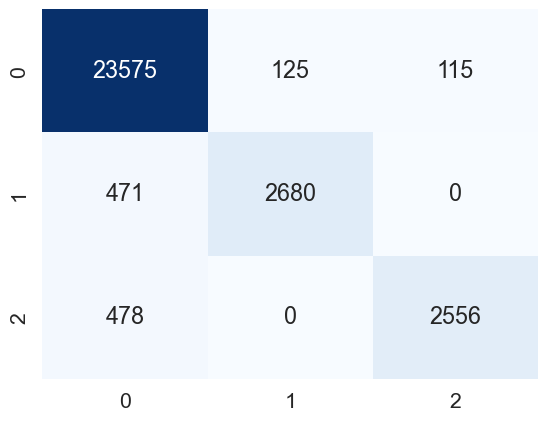

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     23815
           1       0.96      0.85      0.90      3151
           2       0.96      0.84      0.90      3034

    accuracy                           0.96     30000
   macro avg       0.96      0.89      0.92     30000
weighted avg       0.96      0.96      0.96     30000



In [52]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10 , criterion='entropy',random_state=0)
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test) 
rfc_score = accuracy_score(y_pred_rfc,y_test)
print(rfc_score)
print("train score - " + str(rfc.score(X_train, y_train)))
print("test score - " + str(rfc.score(X_test, y_test)))

cm = confusion_matrix(y_test,y_pred_rfc)

sns.set(font_scale=1.4) # for label size
#sns.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.show()
print(classification_report(y_test, y_pred_rfc))

0.8719666666666667
train score - 0.8750714285714286
test score - 0.8719666666666667


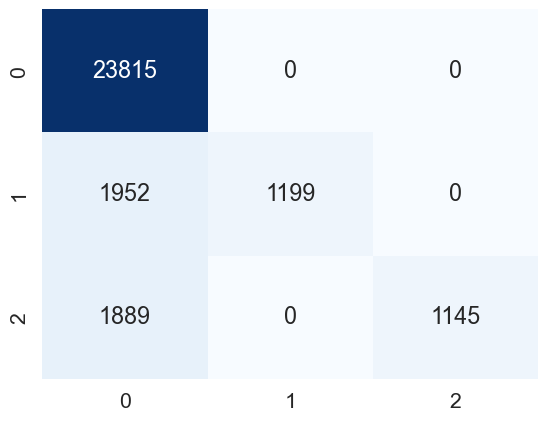

              precision    recall  f1-score   support

           0       0.86      1.00      0.93     23815
           1       1.00      0.38      0.55      3151
           2       1.00      0.38      0.55      3034

    accuracy                           0.87     30000
   macro avg       0.95      0.59      0.67     30000
weighted avg       0.89      0.87      0.85     30000



In [53]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test) 
gnb_score = accuracy_score(y_pred_gnb,y_test)
print(gnb_score)
print("train score - " + str(gnb.score(X_train, y_train)))
print("test score - " + str(gnb.score(X_test, y_test)))
 
cm_gnb = confusion_matrix(y_test,y_pred_gnb)

sns.set(font_scale=1.4) # for label size
#sns.heatmap(cm_gnb, annot=True, annot_kws={"size": 16}) # font size
sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.show()
print(classification_report(y_test, y_pred_gnb))

In [54]:
scores = [XGB_Score, LR_Score, KNN_Score,dtc_score,rfc_score,gnb_score]
print(scores)

[0.7488549611304526, 0.06962686797997597, 0.9706666666666667, 0.9431666666666667, 0.9603666666666667, 0.8719666666666667]


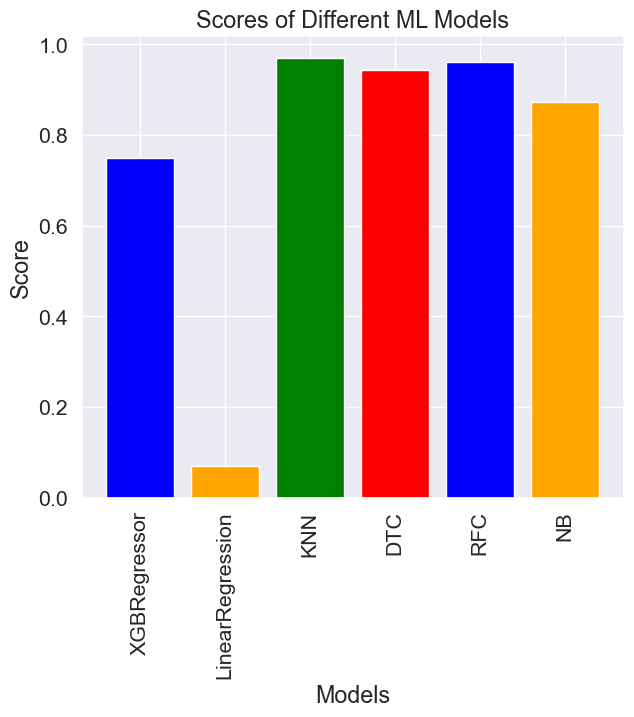

In [55]:
import matplotlib.pyplot as plt
models = ['XGBRegressor', 'LinearRegression', 'KNN','DTC','RFC','NB']
scores = [XGB_Score, LR_Score, KNN_Score,dtc_score,rfc_score,gnb_score]
plt.figure(figsize=(7, 6))
plt.bar(models, scores, color=['blue', 'orange', 'green', 'red'])
plt.title('Scores of Different ML Models')
plt.xlabel('Models')
plt.ylabel('Score')
plt.xticks(rotation=90)

plt.show()


In [56]:
import joblib
joblib.dump(rfc,'bestmodel.joblib')

['bestmodel.joblib']

In [57]:
loaded_best= joblib.load('bestmodel.joblib')

# Now, you can use loaded_svm to make predictions
predictions = loaded_best.predict(X_test)

In [58]:
predictions

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)